<a href="https://colab.research.google.com/github/bananighosh/ml_basics_decoded/blob/main/01_pytorch_demo_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import torch
import torchvision

Torch believes everything is a tensor.

What is a tensor?
A: Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters. Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators.

- tensors enable intuitive and efficient matrix multiplications across different indexing and dimensions
- as NN needs humongous multiplications
- supports differentiation by default - helpful in backpropagation

in the following **a** is a regular array, whereas **b** is a torch tensor

In [15]:
a = np.random.rand(2, 3)
b = torch.from_numpy(a) # torch obj

print(a)
print(b)

[[0.16066598 0.67553124 0.81314135]
 [0.69974972 0.43803901 0.06494475]]
tensor([[0.1607, 0.6755, 0.8131],
        [0.6997, 0.4380, 0.0649]], dtype=torch.float64)


In [16]:
A = torch.rand(2, 2)
B = torch.rand(2, 1)
x = torch.rand(2, 1, requires_grad = True)

y = torch.matmul(A, x) + b
print(y)

tensor([[0.7858, 1.3007, 1.4383],
        [0.8710, 0.6093, 0.2362]], dtype=torch.float64, grad_fn=<AddBackward0>)


In [17]:
z = y.sum()
print(z)

tensor(5.2413, dtype=torch.float64, grad_fn=<SumBackward0>)


In [18]:
# dz/ dx
z.backward()
print(x)
print(x.grad)


tensor([[0.9139],
        [0.3359]], requires_grad=True)
tensor([[1.3560],
        [3.4234]])


# Training neural nets in Torch

Train a simple logistic classifier model on MNIST dataset

In [45]:
trainingData = torchvision.datasets.FashionMNIST('./FashionMNIST/', train = True,  download= True, transform = torchvision.transforms.ToTensor())
testData = torchvision.datasets.FashionMNIST('./FashionMNIST/', train=False, download= True, transform=torchvision.transforms.ToTensor())

In [46]:
print(len(trainingData))
print(len(testData))

60000
10000


In [47]:
image, label = trainingData[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


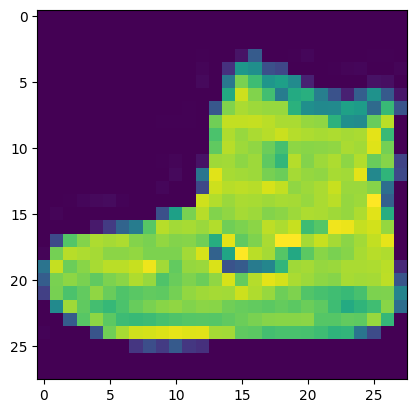

In [48]:
from ast import increment_lineno
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(image.squeeze().numpy()) # as torch of size 1, 28, 28 , so squeeze it to 1D and convert to numpy array
plt.show()

In [49]:
trainDataLoader = torch.utils.data.DataLoader(trainingData, batch_size=64, shuffle = True)
testDataLoader = torch.utils.data.DataLoader(testData, batch_size=64, shuffle=False)

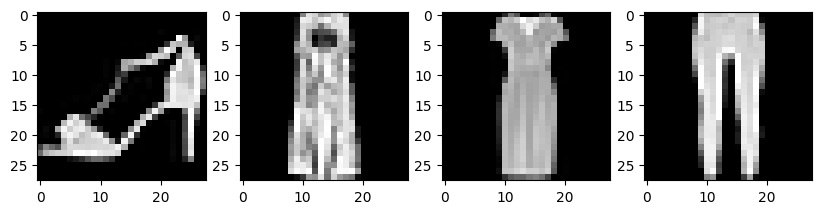

In [50]:
images, labels = next(iter(trainDataLoader))

plt.figure(figsize=(10,4))
for index in np.arange(0,4):
  plt.subplot(1, 4, index + 1)
  plt.imshow(images[index].squeeze().numpy(), cmap=plt.cm.gray)

Torch is Object oriented

## Logistic Classifier

In [51]:
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    self.linear = torch.nn.Linear(28*28, 10) #defined a torch linear layer with 28x28 dims and 10 classes

  def forward(self, x):
    x = x.view(-1, 28*28) #flattens the input vector with view func()
    transformed_x = self.linear(x) # single layer multiplication
    return transformed_x

#Step 1
net = LinearReg().cuda() # we are using GPU using the cuda method and created a NN object

# Step2
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)

In [52]:
train_loss_history = []
test_loss_history = []

for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0

  for i, data in enumerate(trainDataLoader):
    images, labels = data

    # send images and labels to GPU
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad() #zero batch gradient
    predicted_image = net(images)

    fit = loss(predicted_image, labels)
    fit.backward() # back propagation
    optimizer.step()

    train_loss += fit.item() # trigger the training


  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()

      predicted_image = net(images)
      fit = loss(predicted_image, labels)

      test_loss += fit.item()


  train_loss = train_loss / len(trainDataLoader) # no. of datapoints
  test_loss = test_loss / len(testDataLoader)

  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  print(f"Epoch {epoch} , train_loss {train_loss}, test_loss {test_loss}")

Epoch 0 , train_loss 0.9635812398403693, test_loss 0.7513670143048474
Epoch 1 , train_loss 0.6712803300509829, test_loss 0.6502007547837154
Epoch 2 , train_loss 0.6057684552123044, test_loss 0.6059136178083481
Epoch 3 , train_loss 0.5704157588832668, test_loss 0.5788348879024481
Epoch 4 , train_loss 0.5471621430409488, test_loss 0.5610131133513846
Epoch 5 , train_loss 0.5304719721203419, test_loss 0.5483756874017655
Epoch 6 , train_loss 0.5173292680780517, test_loss 0.5368279292704953
Epoch 7 , train_loss 0.50726009605091, test_loss 0.5287206157757218
Epoch 8 , train_loss 0.49863732270975863, test_loss 0.523270693174593
Epoch 9 , train_loss 0.49145339939322297, test_loss 0.5212843245381762
Epoch 10 , train_loss 0.48523163234691885, test_loss 0.5107408832212922
Epoch 11 , train_loss 0.47981487894490327, test_loss 0.5074057495518095
Epoch 12 , train_loss 0.4751926801606282, test_loss 0.501888842529552
Epoch 13 , train_loss 0.4707514165179816, test_loss 0.4979319864777243
Epoch 14 , train

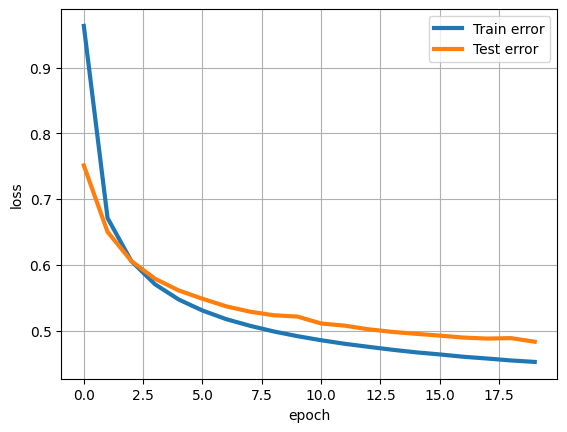

In [53]:
plt.plot(range(20), train_loss_history,'-', linewidth=3, label='Train error')
plt.plot(range(20), test_loss_history, '-', linewidth=3, label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [55]:
predicted_image = net(images)
print(torch.max(predicted_image, 1))
print(labels)

torch.return_types.max(
values=tensor([ 6.2093,  2.9968,  9.0808,  7.8356,  6.5054,  6.2148, 10.0544,  4.5008,
         6.8650, 11.7155, 10.5268, 10.3675,  6.6992,  4.6989,  9.3165,  4.4666],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([3, 1, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0'))
tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')


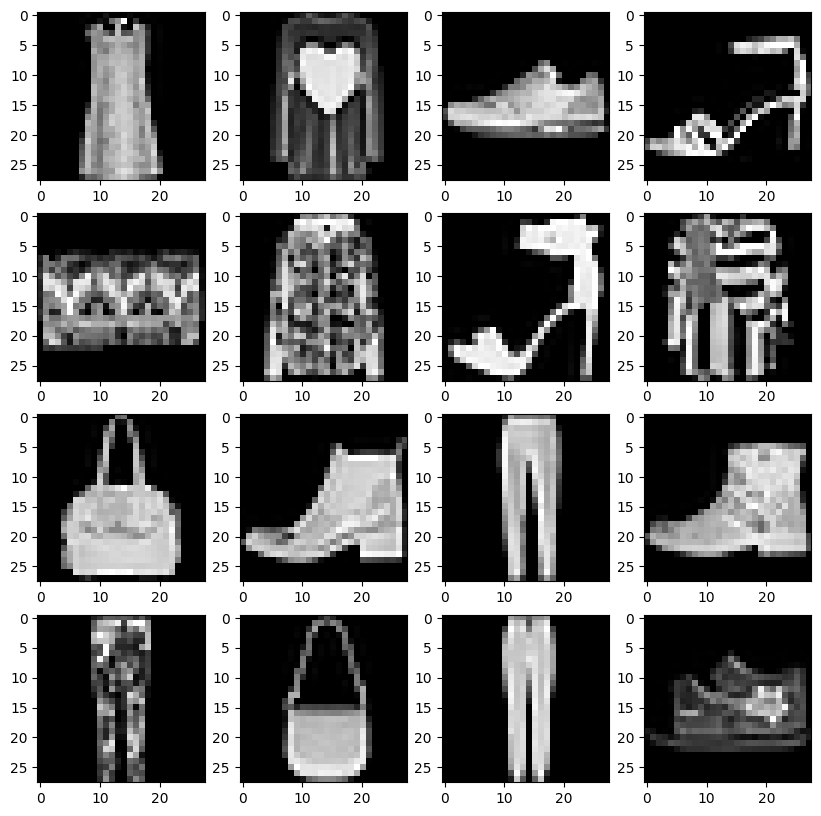

In [56]:
plt.figure(figsize=(10,10))
for index in np.arange(0, 16):
  plt.subplot(4, 4, index + 1)
  plt.imshow(images[index].cpu().squeeze().numpy(), cmap = plt.cm.gray)